In [ ]:
# Setting Directory

In [59]:
import os
os.chdir(r'C:\Users\admin\Desktop\git hub\algos')

In [ ]:
# Hide Warnings

In [60]:
import warnings  
warnings.filterwarnings('ignore')

In [61]:
# Import relevant libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

In [63]:
# Read data

In [64]:
df1 = pd.read_csv('computers.csv')

In [4]:
df1.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1994,50,107,2,14,yes,no,yes,283,10
1,2024,25,170,4,14,yes,no,no,275,12
2,2427,66,540,8,15,yes,yes,yes,339,17
3,1899,33,420,4,14,yes,no,yes,273,18
4,1973,33,528,8,14,yes,yes,yes,191,23


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 10 columns):
price      1022 non-null int64
speed      1022 non-null int64
hd         1022 non-null int64
ram        1022 non-null int64
screen     1022 non-null int64
cd         1022 non-null object
multi      1022 non-null object
premium    1022 non-null object
ads        1022 non-null int64
trend      1022 non-null int64
dtypes: int64(7), object(3)
memory usage: 80.0+ KB


In [ ]:
# Box Plot

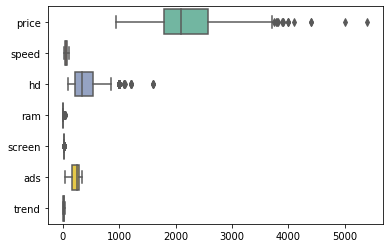

In [6]:
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

In [ ]:
# Encode the categorical variables

In [65]:
df = pd.get_dummies(df1,columns=['cd', 'multi', 'premium'],drop_first=True)
df.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1994,50,107,2,14,283,10,1,0,1
1,2024,25,170,4,14,275,12,1,0,0
2,2427,66,540,8,15,339,17,1,1,1
3,1899,33,420,4,14,273,18,1,0,1
4,1973,33,528,8,14,191,23,1,1,1


In [ ]:
# summary statistics

In [8]:
df.describe()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,2192.758317,52.039139,406.703523,8.158513,14.646771,220.695695,16.202544,0.479452,0.146771,0.901174
std,592.114579,21.092503,250.637603,5.686756,0.935472,75.142609,7.810003,0.499822,0.354051,0.298574
min,949.000000,25.000000,85.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000
25%,1790.000000,33.000000,214.000000,4.000000,14.000000,162.000000,10.000000,0.000000,0.000000,1.000000
50%,2095.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000
75%,2567.250000,66.000000,528.000000,8.000000,15.000000,283.000000,22.000000,1.000000,0.000000,1.000000
max,5399.000000,100.000000,1600.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000


In [ ]:
# We are going to predict price, so let’s see how each independent variable correlates with this dependent variable

[Text(0.5, 0, 'price'),
 Text(1.5, 0, 'speed'),
 Text(2.5, 0, 'hd'),
 Text(3.5, 0, 'ram'),
 Text(4.5, 0, 'screen'),
 Text(5.5, 0, 'ads'),
 Text(6.5, 0, 'trend'),
 Text(7.5, 0, 'cd_yes'),
 Text(8.5, 0, 'multi_yes'),
 Text(9.5, 0, 'premium_yes')]

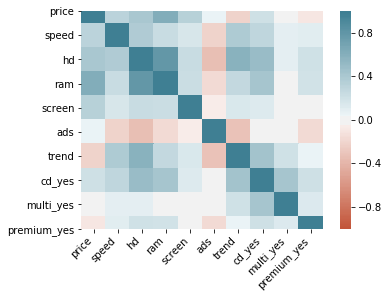

In [9]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
# Corr matrix

In [10]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price          1.000000
ram            0.623086
hd             0.418913
screen         0.333393
speed          0.316486
cd_yes         0.215482
ads            0.056045
multi_yes     -0.013688
premium_yes   -0.090511
trend         -0.215846
Name: price, dtype: float64

In [11]:
# Try different scales to find the most suitable

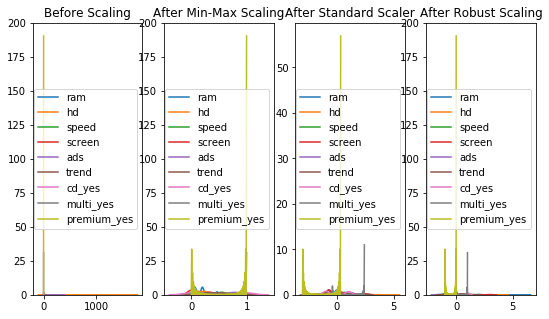

In [66]:
x = pd.DataFrame({
    'ram': df.ram,
    'hd': df.hd,
    'speed': df.speed,
    'screen' : df.screen,
    'ads': df.ads,
    'trend' : df.trend,
    'cd_yes': df.cd_yes,
    'multi_yes': df.multi_yes,
    'premium_yes':df.premium_yes
})

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['ram', 'hd', 'speed', 'screen', 'ads', 'trend','cd_yes', 'multi_yes', 'premium_yes'])

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=['ram', 'hd', 'speed', 'screen', 'ads', 'trend','cd_yes', 'multi_yes', 'premium_yes'])
    
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['ram', 'hd', 'speed', 'screen', 'ads', 'trend', 'cd_yes', 'multi_yes', 'premium_yes'])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['ram'], ax=ax1)
sns.kdeplot(x['hd'], ax=ax1)
sns.kdeplot(x['speed'], ax=ax1)
sns.kdeplot(x['screen'], ax=ax1)
sns.kdeplot(x['ads'], ax=ax1)
sns.kdeplot(x['trend'], ax=ax1)
sns.kdeplot(x['cd_yes'], ax=ax1)
sns.kdeplot(x['multi_yes'], ax=ax1)
sns.kdeplot(x['premium_yes'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['ram'], ax=ax2)
sns.kdeplot(minmax_scaled_df['hd'], ax=ax2)
sns.kdeplot(minmax_scaled_df['speed'], ax=ax2)
sns.kdeplot(minmax_scaled_df['screen'], ax=ax2)
sns.kdeplot(minmax_scaled_df['ads'], ax=ax2)
sns.kdeplot(minmax_scaled_df['trend'], ax=ax2)
sns.kdeplot(minmax_scaled_df['cd_yes'], ax=ax2)
sns.kdeplot(minmax_scaled_df['multi_yes'], ax=ax2)
sns.kdeplot(minmax_scaled_df['premium_yes'], ax=ax2)

ax3.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['ram'], ax=ax3)
sns.kdeplot(scaled_df['hd'], ax=ax3)
sns.kdeplot(scaled_df['speed'], ax=ax3)
sns.kdeplot(scaled_df['screen'], ax=ax3)
sns.kdeplot(scaled_df['ads'], ax=ax3)
sns.kdeplot(scaled_df['trend'], ax=ax3)
sns.kdeplot(scaled_df['cd_yes'], ax=ax3)
sns.kdeplot(scaled_df['multi_yes'], ax=ax3)
sns.kdeplot(scaled_df['premium_yes'], ax=ax3)

ax4.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['ram'], ax=ax4)
sns.kdeplot(robust_scaled_df['hd'], ax=ax4)
sns.kdeplot(robust_scaled_df['speed'], ax=ax4)
sns.kdeplot(robust_scaled_df['screen'], ax=ax4)
sns.kdeplot(robust_scaled_df['ads'], ax=ax4)
sns.kdeplot(robust_scaled_df['trend'], ax=ax4)
sns.kdeplot(robust_scaled_df['cd_yes'], ax=ax4)
sns.kdeplot(robust_scaled_df['multi_yes'], ax=ax4)
sns.kdeplot(robust_scaled_df['premium_yes'], ax=ax4)
plt.show()

In [ ]:
#Based on the result, Robust Scaler is preferred for this dataset

In [ ]:
# predictor and target split

In [67]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [68]:
# Split the dataset 

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [70]:
# Import the relevant packages

In [71]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [72]:
# Select features and Find the best hyper-parameters for the regressors

In [73]:
# Linear Regression
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes', 'multi_yes', 'premium_yes']


In [74]:
# print(model.summary())

In [75]:
print(model.pvalues)

const           4.705365e-03
speed           2.539097e-77
hd              1.172543e-22
ram             1.086303e-57
screen          1.436415e-31
ads             1.280965e-04
trend          1.113142e-160
cd_yes          9.363687e-04
multi_yes       6.803273e-04
premium_yes     1.242102e-54
dtype: float64


In [81]:
# XGboost
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train)
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [82]:
# AdaBoost
tuned_parameters = [{'learning_rate': [0.1,1,2,3,4,5], 'n_estimators': [100,200,300, 400, 500]}]
MSE_ada = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
    adaregr.fit(X_train, y_train)
    y_true, y_pred3 = y_test, adaregr.predict(X_test)
    
print('The best hyper-parameters for AdaBoost are: ', adaregr.best_params_ )                               

The best hyper-parameters for AdaBoost are:  {'learning_rate': 3, 'n_estimators': 200}


In [83]:
# Decision Tree
tuned_parameters = [{'max_depth': [1,2,3,4,5,10, 15, 20, 25, 50, 100,200]}]
MSE_dt = ['mean_squared_error(y_test,y_pred4)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    regressor_dt.fit(X_train, y_train)
    y_true, y_pred4 = y_test, regressor_dt.predict(X_test)
    
print('The optimum max_depth for Decision Tree is: ', regressor_dt.best_params_ )                        

The optimum max_depth for Decision Tree is:  {'max_depth': 10}


In [84]:
# Random Forests
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)                             

The best hyper-parameters for Random Forests are:  {'max_depth': 15, 'n_estimators': 25}


In [85]:
# KNN
scaler = preprocessing.RobustScaler()                         # Features Scaling is required for distance-based algorithms
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,15,20], 'p': [1,2]}]
MSE_knn = ['mean_squared_error(y_test,y_pred)']
for i in MSE_knn:
    model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=4)
    model.fit(X_train_scaled, y_train)
    y_true, y_pred6 = y_test, model.predict(X_test_scaled)
    
print('The best hyper-parameters for KNN are: ', model.best_params_)                              

The best hyper-parameters for KNN are:  {'n_neighbors': 3, 'p': 1}


In [86]:
# SVM
tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'], 'C':[1, 2, 3, 5, 6, 7, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}]
MSE_svm = ['mean_squared_error(y_test,y_pred7)']
for value in MSE_svm:
    svr_regr = GridSearchCV(SVR(), tuned_parameters, cv=4)
    svr_regr.fit(X_train_scaled, y_train)
    y_true, y_pred7 = y_test, svr_regr.predict(X_test_scaled)
    
print('The best hyper-parameters for SVR are: ', svr_regr.best_params_)

The best hyper-parameters for SVR are:  {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}


In [ ]:
# Build the models using the tuned hyper-parameters and fit

In [88]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state = 0, silent = True)
regr.fit(X_train, y_train)

# AdaBoost
adaregr = AdaBoostRegressor(random_state=0, learning_rate = 3, n_estimators=200)
adaregr.fit(X_train, y_train)

# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 10)
regressor_dt.fit(X_train,y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=15, random_state=0,
                             n_estimators=25)
regr_rf.fit(X_train, y_train)

# KNN
neigh = KNeighborsRegressor(n_neighbors = 3, metric = 'minkowski', p = 1)
neigh.fit(X_train_scaled, y_train)

# SVR
svr_regr = SVR(gamma=0.0001, kernel = 'linear', C =10)
svr_regr.fit(X_train_scaled, y_train) 

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
# Predict price using the models above

In [90]:
y_pred1 = regressor.predict(X_test_scaled)    # Linear regression
y_pred2 = regr.predict(X_test)                # XGBoost
y_pred3 = adaregr.predict(X_test)             # AdaBoost
y_pred4 = regressor_dt.predict(X_test)        # Decision Tree
y_pred5 = regr_rf.predict(X_test)             # Random Forests
y_pred6 = neigh.predict(X_test_scaled)        # KNN
y_pred7 = svr_regr.predict(X_test_scaled)     # SVR

In [91]:
# Find R Squared (R^2) Values

In [92]:
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test,y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is        :', round((r2_score(y_test,y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is       :', round((r2_score(y_test,y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is  :', round((r2_score(y_test,y_pred4)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred5)), 3))
print('The R^2 value for KNN Regressor is            :', round((r2_score(y_test,y_pred6)), 3))
print('The R^2 value for SVM Regressor is            :', round((r2_score(y_test,y_pred7)), 3))

The R^2 value for Linear Regression is        : 0.806
The R^2 value for XGBoost Regressor is        : 0.885
The R^2 value for AdaBoost Regressor is       : 0.728
The R^2 value for Decision Tree Regressor is  : 0.758
The R^2 value for Random Forests Regressor is : 0.86
The R^2 value for KNN Regressor is            : 0.795
The R^2 value for SVM Regressor is            : 0.758


In [ ]:
# Find adjusted R Squared (Adj R2) Values

In [118]:
print('The Adj R2 value for Linear Regression is        :', round((1 - (1-r2_score(y_test,y_pred1))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is       :', round((1 - (1-r2_score(y_test,y_pred3))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(y_test,y_pred4))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for KNN Regressor is            :', round((1 - (1-r2_score(y_test,y_pred6))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for SVM Regressor is            :', round((1 - (1-r2_score(y_test,y_pred7))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Linear Regression is        : 0.804
The Adj R2 value for XGBoost Regressor is        : 0.884
The Adj R2 value for AdaBoost Regressor is       : 0.725
The Adj R2 value for Decision Tree Regressor is  : 0.756
The Adj R2 value for Random Forests Regressor is : 0.859
The Adj R2 value for KNN Regressor is            : 0.793
The Adj R2 value for SVM Regressor is            : 0.756


In [93]:
# Find Mean Squared Errors (MSE) and Root Mean Squared Errors (RMSE)

In [94]:
MSE_lr  = mean_squared_error(y_test,y_pred1)
MSE_xgb = mean_squared_error(y_test,y_pred2)
MSE_ada = mean_squared_error(y_test,y_pred3)
MSE_dt  = mean_squared_error(y_test,y_pred4)
MSE_rf  = mean_squared_error(y_test,y_pred5)
MSE_knn = mean_squared_error(y_test,y_pred6)
MSE_svr = mean_squared_error(y_test,y_pred7)

In [95]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSE value for KNN Regressor is            :', round(np.sqrt(MSE_knn)));
print('The RMSE value for SVM Regressor is            :', round(np.sqrt(MSE_svr)));

The RMSE value for Linear Regression is        : 268.0
The RMSE value for XGBoost Regressor is        : 207.0
The RMSE value for AdaBoost Regressor is       : 318.0
The RMSE value for Decision Tree Regressor is  : 299.0
The RMSE value for Random Forests Regressor is : 228.0
The RMSE value for KNN Regressor is            : 276.0
The RMSE value for SVM Regressor is            : 300.0


In [96]:
# Plot the actual vs predicted prices

Text(0.5, 1.0, 'Linear Regression')

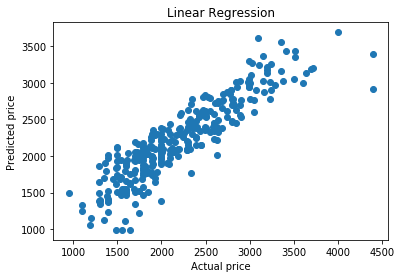

In [97]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Xgboost')

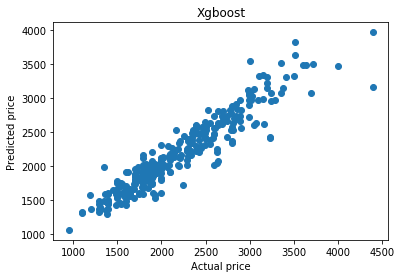

In [98]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Xgboost")

Text(0.5, 1.0, 'Adaboost')

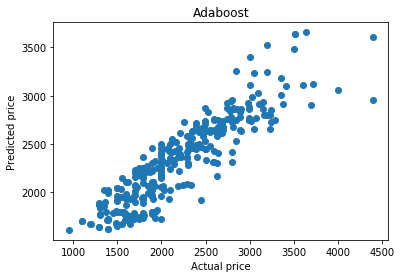

In [99]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Adaboost")

Text(0.5, 1.0, 'Decision Tree')

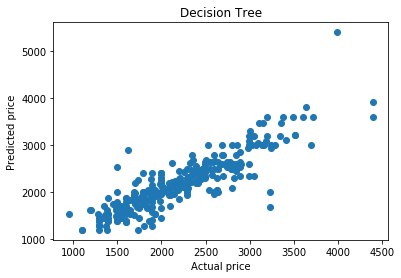

In [100]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Decision Tree")

Text(0.5, 1.0, 'Random Forest')

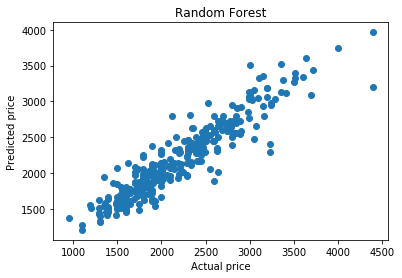

In [101]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Random Forest")

Text(0.5, 1.0, 'KNN')

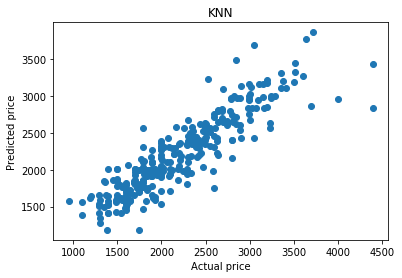

In [102]:
plt.scatter(y_test, y_pred6)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("KNN")

Text(0.5, 1.0, 'SVM')

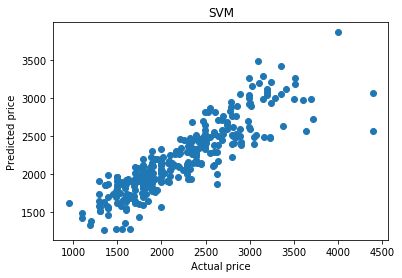

In [103]:
plt.scatter(y_test, y_pred7)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("SVM")